### Data Cleaning

In [3]:
import sklearn
import pandas as pd
import numpy as np
import datetime
import os

In [4]:
csv_dir = os.path.join('datasets', 'data-prep')
cars_csv = os.path.join(csv_dir,'cars.csv')

In [5]:
automobile_df = pd.read_csv(cars_csv)
automobile_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,?
2,plymouth satellite,18.0,?,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [6]:
automobile_df.shape

(394, 12)

In [8]:
automobile_df = automobile_df.replace('?', np.nan)
automobile_df.head()

,Model,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
0,chevrolet chevelle malibu,18.0,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan",3.47,2.68,9
1,buick skylark 320,15.0,8,350,165,3693,11.5,1970,US],3.47,2.68,NaN
2,plymouth satellite,18.0,NaN,318,150,3436,11,"1970, 1976",US,2.68,3.47,9
3,amc rebel sst,16.0,8,304,150,3433,12,1970,US,3.19,3.40,10
4,ford torino,17.0,8,302,140,3449,10.5,1970-1972,US],3.19,3.40,8


In [11]:
automobile_df.isna().sum()

Model                0
MPG                  9
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [12]:
automobile_df['MPG'].fillna(automobile_df['MPG'].mean(), inplace = True)

In [13]:
automobile_df.isna().sum() 

Model                0
MPG                  0
Cylinders            2
Displacement         1
Horsepower           0
Weight               1
Acceleration         1
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    2
dtype: int64

In [14]:
automobile_df.dropna(inplace=True)

In [15]:
automobile_df.shape

(387, 12)

In [16]:
 automobile_df.isnull().sum()

Model                0
MPG                  0
Cylinders            0
Displacement         0
Horsepower           0
Weight               0
Acceleration         0
Year                 0
Origin               0
bore                 0
stroke               0
compression-ratio    0
dtype: int64

In [19]:
automobile_df.drop(['Model'], axis=1, inplace=True)

In [20]:
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin,bore,stroke,compression-ratio
351,33.7,4,107,75,2210,14.4,1981,Japan,3.08,3.15,9.4
143,32.0,4,83,61,2003,19,1974,Japan,3.62,2.64,9
274,21.6,4,121,115,2795,15.7,1978,Europe,3.01,3.40,23
363,28.0,4,112,88,2605,19.6,1982,US,3.58,3.64,21.5
148,26.0,4,108,93,2391,15.5,1974,Japan,3.62,2.64,9


In [21]:
automobile_df.drop(['bore', 'stroke', 'compression-ratio'], axis=1, inplace=True)

In [22]:
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
0,18.000000,8,307,130,3504,12,1970[1975],"US; Detroit, Michigan"
3,16.000000,8,304,150,3433,12,1970,US
4,17.000000,8,302,140,3449,10.5,1970-1972,US]
6,14.000000,8,454,220,4354,9,1970[1975],"US; Detroit, Michigan"
7,23.551429,8,440,215,4312,8.5,1970,US


In [27]:
automobile_df['Year'].str.isnumeric().value_counts()

True     351
False     36
Name: Year, dtype: int64

In [35]:
automobile_df['Year'].loc[automobile_df['Year'].str.isnumeric() == False]

0          1970[1975]
4           1970-1972
6          1970[1975]
30      1971[1973]971
35         1971[1973]
40         1971[1973]
44         1971[1973]
49         1971[1973]
56         1972[1973]
61         1972[1973]
65         1972[1973]
68         1972[1973]
73         1972[1973]
75            1972-73
79            1972-73
82            1972-73
96          1973-1974
97         1973, 1974
102    1973, 19741973
105        1973, 1974
108        1973, 1974
112        1973, 1974
115        1973, 1974
126        1974, 1975
131        1974, 1975
134        1974, 1975
137        1974, 1975
139    1974, 19751974
142        1974, 1975
365         1982-1985
374         1982-1985
380         1982-1985
383         1982-1985
387         1982-1985
389         1982-1985
391         1982-1985
Name: Year, dtype: object

In [37]:
extr = automobile_df['Year'].str.extract(r'^(\d{4})', expand = False)
extr.head()

0    1970
3    1970
4    1970
6    1970
7    1970
Name: Year, dtype: object

In [38]:
 automobile_df['Year'] = pd.to_numeric(extr)

In [39]:
automobile_df['Age'] = datetime.datetime.now().year - automobile_df['Year']
automobile_df.drop(['Year'], axis=1, inplace=True)
automobile_df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
0,18.000000,8,307,130,3504,12,"US; Detroit, Michigan",50
3,16.000000,8,304,150,3433,12,US,50
4,17.000000,8,302,140,3449,10.5,US],50
6,14.000000,8,454,220,4354,9,"US; Detroit, Michigan",50
7,23.551429,8,440,215,4312,8.5,US,50


In [40]:
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
53,35.0,4,72,69,1613,18,Japan; Tokyo],49
331,23.7,3,70,100,2420,12.5,Japan,40
352,32.4,4,108,75,2350,16.8,Japan,39
72,13.0,8,307,130,4098,14,US,48
33,16.0,6,225,105,3439,13,US,49


In [41]:
automobile_df.dtypes

MPG             float64
Cylinders        object
Displacement     object
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [42]:
automobile_df['Cylinders'].isnull().values.any()

False

In [43]:
automobile_df['Cylinders'].str.isnumeric().value_counts()

True     378
False      9
Name: Cylinders, dtype: int64

In [45]:
automobile_df['Cylinders'].loc[automobile_df['Cylinders'].str.isnumeric() == False]

11    -
22    -
32    -
42    -
51    -
58    -
69    -
82    -
89    -
Name: Cylinders, dtype: object

In [53]:
#automobile_df['Cylinders'].replace('-', np.nan, inplace=True)
automobile_df['Cylinders'].replace(np.nan, '-', inplace=True)

In [54]:
cylinders = automobile_df['Cylinders'].loc[automobile_df['Cylinders'] != '-']
cmean = cylinders.astype(int).mean()
cmean

5.420634920634921

In [56]:
automobile_df['Cylinders'] = automobile_df['Cylinders'].replace('-', cmean).astype(int)

In [58]:
automobile_df['Displacement'] = pd.to_numeric(automobile_df['Displacement'], errors = 'coerce')

In [59]:
automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight           object
Acceleration     object
Origin           object
Age               int64
dtype: object

In [60]:
automobile_df['Weight'] = pd.to_numeric(automobile_df['Weight'], errors = 'coerce')
automobile_df['Acceleration'] = pd.to_numeric(automobile_df['Acceleration'], errors = 'coerce')
automobile_df.dtypes

MPG             float64
Cylinders         int32
Displacement    float64
Horsepower        int64
Weight            int64
Acceleration    float64
Origin           object
Age               int64
dtype: object

In [62]:
automobile_df['Origin'].unique()

array(['US; Detroit, Michigan', 'US', 'US]', 'Japan; Aichi',
       'Europe-Germany', 'Europe', 'Japan; Tokyo', 'Japan; Aichi]',
       'US; Detroit, Michigan]', 'Japan; Tokyo]', 'Japan',
       'Europe Germany'], dtype=object)

In [63]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('US'), 'US', automobile_df['Origin'])

In [64]:
automobile_df['Origin'].unique()

array(['US', 'Japan; Aichi', 'Europe-Germany', 'Europe', 'Japan; Tokyo',
       'Japan; Aichi]', 'Japan; Tokyo]', 'Japan', 'Europe Germany'],
      dtype=object)

In [65]:
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Japan'), 'Japan', automobile_df['Origin'])
automobile_df['Origin'] = np.where(automobile_df['Origin'].str.contains('Europe'), 'Europe', automobile_df['Origin'])
automobile_df['Origin'].unique()

array(['US', 'Japan', 'Europe'], dtype=object)

In [66]:
automobile_df.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Age
count,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000,387.000000
mean,23.672514,5.410853,192.184755,103.645995,2965.387597,15.573643,43.917313
std,7.736579,1.667795,103.703706,38.128651,846.332848,2.746260,3.668715
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,38.000000
25%,17.600000,4.000000,102.500000,75.000000,2221.500000,13.900000,41.000000
50%,23.200000,4.000000,146.000000,92.000000,2790.000000,15.500000,44.000000
75%,29.000000,6.000000,260.000000,121.000000,3589.500000,17.050000,47.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,50.000000


In [67]:
automobile_df.to_csv(os.path.join(csv_dir,'cars_processed.csv'), index=False)

In [85]:
ls "datasets/data-prep"

 Volume in drive C is Windows
 Volume Serial Number is 2A82-BEAC

 Directory of C:\Users\pankaj\00_python_codes\Pluralsight\PythonProgramming\corepy\PythonPractise\datasets\data-prep

12-04-2020  17:42    <DIR>          .
12-04-2020  17:42    <DIR>          ..
12-04-2020  17:42            13,441 auto_mpg_processed.csv
12-04-2020  17:42            18,131 auto-mpg.csv
12-04-2020  17:42            25,336 cars.csv
12-04-2020  18:23            13,530 cars_processed.csv
12-04-2020  17:42            23,873 diabetes.csv
12-04-2020  17:42            39,972 diabetes_processed.csv
12-04-2020  17:42            31,612 diabetes_processed_incomplete.csv
12-04-2020  17:42         1,616,446 GoSales_Tx_LogisticRegression.csv
               8 File(s)      1,782,341 bytes
               2 Dir(s)  668,110,372,864 bytes free


### Data Exploration

In [87]:
%matplotlib inline
from matplotlib import pyplot as plt

In [88]:
automobile_df.sample(5)

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Origin,Age
90,13.0,8,400.0,150,4464,12.0,US,47
22,25.0,5,104.0,95,2375,17.5,Europe,50
362,17.6,6,225.0,85,3465,16.6,US,39
287,16.9,8,350.0,155,4360,14.9,US,41
201,29.5,4,97.0,71,1825,12.2,Europe,44


Text(0, 0.5, 'Miles per Gallon')

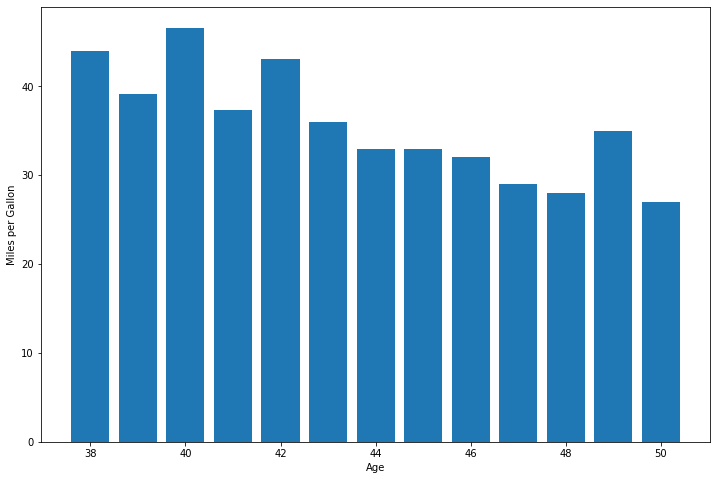

In [92]:
plt.figure(figsize=(12,8))
plt.bar(automobile_df['Age'], automobile_df['MPG'])
plt.xlabel("Age")
plt.ylabel("Miles per Gallon")

Text(0, 0.5, 'Miles per Gallon')

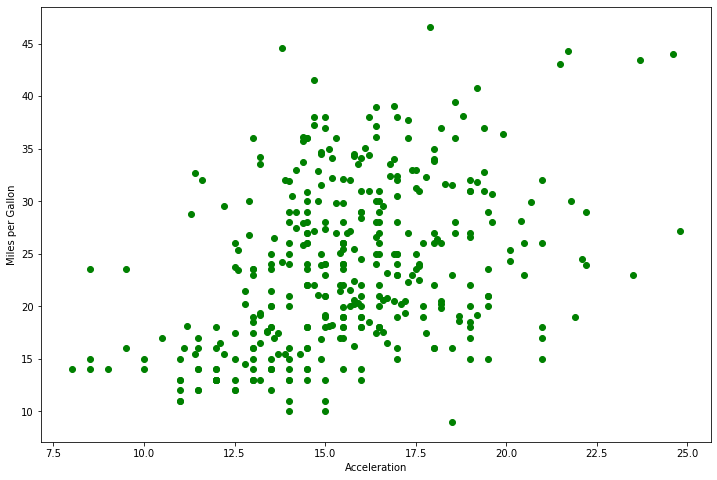

In [93]:
plt.figure(figsize=(12,8))
plt.scatter(automobile_df['Acceleration'], automobile_df['MPG'], color='g')
plt.xlabel('Acceleration')
plt.ylabel('Miles per Gallon')

Text(0, 0.5, 'Miles per Gallon')

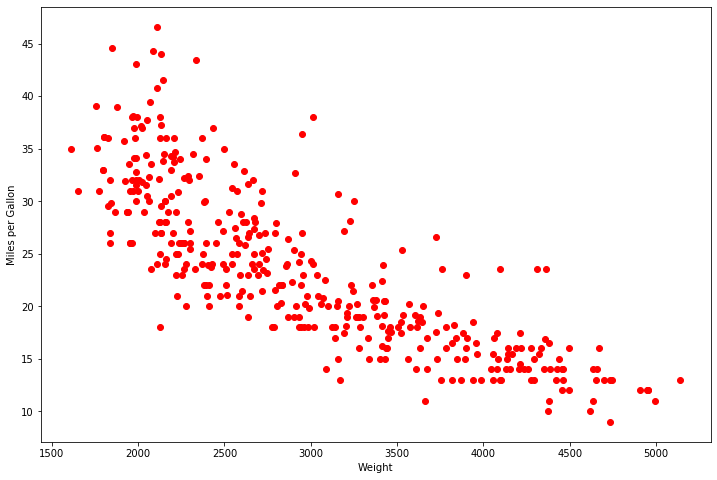

In [94]:
plt.figure(figsize=(12,8))
plt.scatter(automobile_df['Weight'], automobile_df['MPG'], color='r')
plt.xlabel('Weight')
plt.ylabel('Miles per Gallon')

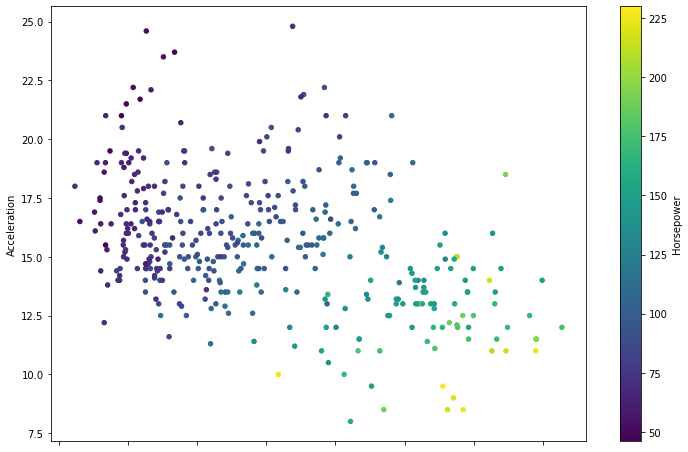

In [95]:
automobile_df.plot.scatter(x='Weight', y= 'Acceleration', c='Horsepower', colormap='viridis', figsize=(12,8))

Text(0, 0.5, 'Miles Per Gallon')

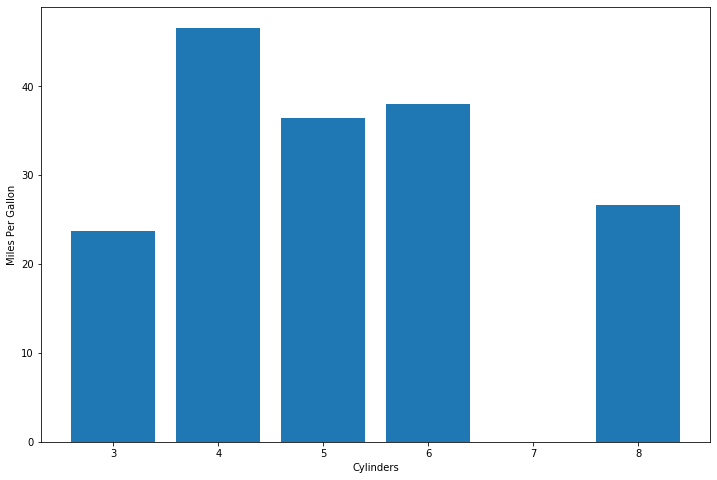

In [97]:
plt.figure(figsize=(12,8))
plt.bar(automobile_df['Cylinders'], automobile_df['MPG'])
plt.xlabel('Cylinders')
plt.ylabel('Miles Per Gallon')

In [99]:
automobile_df.drop(['Cylinders', 'Origin'], inplace=True, axis=1)
automobile_df.sample(10)

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
91,23.551429,351.0,158,4363,13.0,47
332,35.000000,122.0,88,2500,15.1,40
343,37.000000,85.0,65,1975,19.4,39
62,14.000000,400.0,175,4385,12.0,48
41,12.000000,383.0,180,4955,11.5,49
135,13.000000,350.0,150,4699,14.5,46
178,25.000000,121.0,115,2671,13.5,45
176,23.000000,120.0,88,2957,17.0,45
118,20.000000,114.0,91,2582,14.0,47
141,26.000000,97.0,78,2300,14.5,46


In [100]:
cars_corr = automobile_df.corr()
cars_corr

,MPG,Displacement,Horsepower,Weight,Acceleration,Age
MPG,1.000000,-0.788492,-0.761499,-0.820138,0.392186,-0.566242
Displacement,-0.788492,1.000000,0.894199,0.932822,-0.526901,0.357047
Horsepower,-0.761499,0.894199,1.000000,0.863388,-0.670920,0.404458
Weight,-0.820138,0.932822,0.863388,1.000000,-0.397181,0.299049
Acceleration,0.392186,-0.526901,-0.670920,-0.397181,1.000000,-0.292705
Age,-0.566242,0.357047,0.404458,0.299049,-0.292705,1.000000


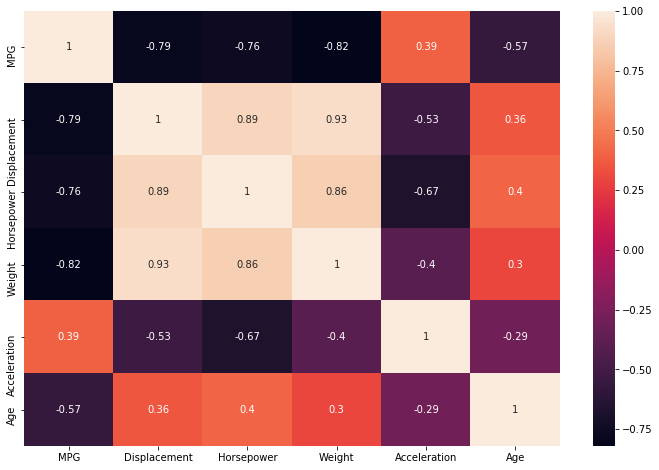

In [101]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(cars_corr, annot=True)

In [102]:
automobile_df.to_csv(os.path.join(csv_dir,'cars_processed2.csv'), index=False)